<a href="https://colab.research.google.com/github/Angshuman-nits/ML_Projects/blob/main/DiabetesKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
df=pd.read_csv('/content/gdrive/MyDrive/KNN_Dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#here 1=DIABETIC 0=NON-DIABETIC

In [3]:
#NO need of label encoder this time since all are numerical data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [7]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#hence no null values are present..now check for duplicate data

In [12]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [13]:
#hence no duplicated data

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
#NOW WE NEED TO REPLACE ZEROS BECOZ GLUCOSE,BP,SKINTHICKNESS cant be zero

In [20]:
zero_not_accepted=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [21]:
for col in zero_not_accepted:
  df[col]=df[col].replace(0,np.NaN)
  mean=int(df[col].mean(skipna=True))
  df[col]=df[col].replace(np.NaN,mean)
  #replacing the 0 by NaN value then again replacing NaN by Mean value

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [39]:
#now we'll split into train test set
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [40]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [38]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

***FEATURE SCALING ON THE TRAINING SET***

In [71]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [72]:
x_train

array([[ 0.90832902,  0.93641795,  0.44764174, ...,  0.36863635,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.81630913, -1.05200558, ..., -0.63294341,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.43247278,  1.44740662, ...,  2.81535261,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.91552009, -0.63543688, ..., -1.13373329,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.21315299,  0.11438678, ..., -0.36108605,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47343344,  0.7808967 , ..., -0.08922869,
         0.52121586,  2.94889395]])

In [78]:
#DEFINE THE MODEL
classifier=KNeighborsClassifier(n_neighbors=11,metric='euclidean',p=2)

In [79]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [80]:
y_pred=classifier.predict(x_test)

In [81]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182


[[94 13]
 [15 32]]


<Axes: >

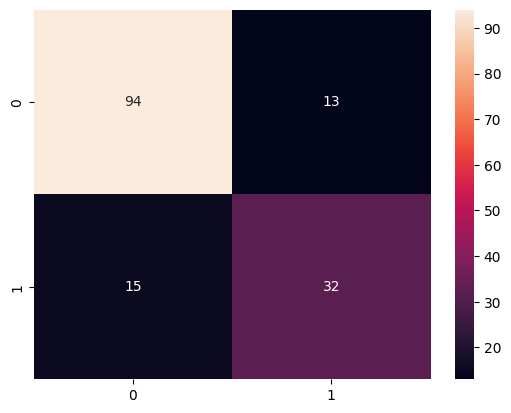

In [84]:
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True ,fmt='d')

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154

